In [1]:
%matplotlib inline

In [2]:
import matplotlib.pylab as plt

In [3]:
import pysal
import numpy as np
np.random.seed(12345)
from pysal.esda.getisord import G


In [4]:
from pysal.esda.getisord import G
from pysal.esda.getisord import G_Local

In [5]:
nx = 10
w=pysal.lat2W(nx,nx)

# plt.imshow(w.full()[0][:10, :10], interpolation='none')
# plt.colorbar()

In [6]:
x,y=np.indices((nx,nx))
x.shape=(nx**2,1)
y.shape=(nx**2,1)
data=np.hstack([x,y])
w = pysal.Kernel(data, fixed = False, function = 'gaussian')
# plt.imshow(kw.full()[0][:10, :10], interpolation='none')
# plt.colorbar()

In [7]:
y=np.ones(nx**2)
y[0:nx**2/2]=0

g = G(y, w)

print g.G
print g.EG
print g.z_sim
print g.p_sim

0.0612244897959
0.030303030303
10.2686332141
0.001


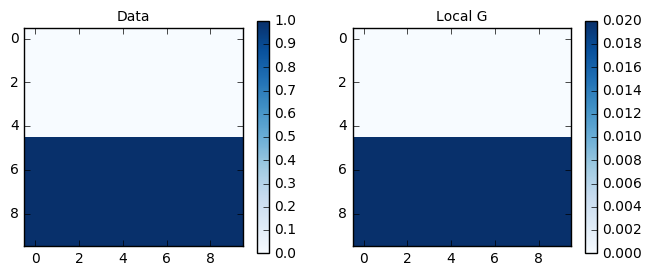

In [8]:
lg = G_Local(y, w)
lgstar = G_Local(y, w, star=True)

y = y.reshape(nx,nx)

plt.figure(1, figsize = (12,3))
ax = plt.subplot(131)
plt.imshow(y, cmap = 'Blues', interpolation='none')
plt.colorbar()
plt.title('Data', fontsize = 10)
ax = plt.subplot(132)
plt.title('Local G', fontsize = 10)
plt.imshow(lgstar.Gs.reshape((nx,nx)), cmap = 'Blues', interpolation='none')
plt.colorbar()

In [9]:
import scipy as sp

def build_checkerboard(w, h) :
    re = np.r_[ w*[0,1] ]              # even-numbered rows
    ro = np.r_[ w*[1,0] ]              # odd-numbered rows
    return np.row_stack(h*(re, ro))

y = build_checkerboard(nx/2, nx/2)

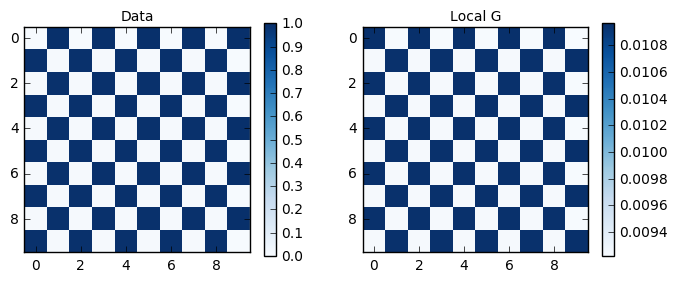

In [10]:
lg = G_Local(y, w)
lgstar = G_Local(y, w, star=True)
y = y.reshape(nx,nx)

plt.figure(1, figsize = (8,3))
ax = plt.subplot(121)
plt.imshow(y, cmap = 'Blues', interpolation='none')
plt.title('Data', fontsize = 10)
plt.colorbar()

ax = plt.subplot(122)
plt.title('Local G', fontsize = 10)
plt.imshow(lg.Gs.reshape((nx,nx)), cmap = 'Blues', interpolation='none')
plt.colorbar()

## Noise

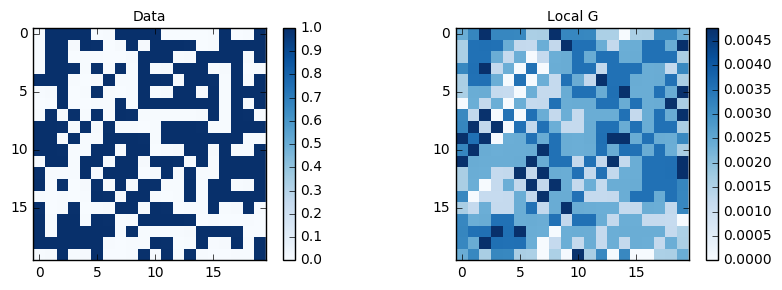

In [169]:
y = sp.randn(nx, nx) > 0

lg = G_Local(y, w)
lgstar = G_Local(y, w, star=True)

plt.figure(1, figsize = (10,3))
ax = plt.subplot(121)
plt.imshow(y, cmap = 'Blues', interpolation='none')
plt.title('Data', fontsize = 10)
plt.colorbar()

ax = plt.subplot(122)
plt.title('Local G', fontsize = 10)
plt.imshow(lg.Gs.reshape((nx,nx)), cmap = 'Blues', interpolation='none')
plt.colorbar()
# plt.pcolor((lm.p_sim<0.05).reshape(nx,nx), alpha  = 0.5, cmap = 'cubehelix')

### Gaussian

In [173]:
from  scipy.ndimage.filters import gaussian_filter
nx = 20

y = sp.randn(nx, nx) 
z =  gaussian_filter(y, 3, order=2, output=None, mode='reflect', cval=0.0, truncate=20.0)

w=pysal.lat2W(nx,nx)

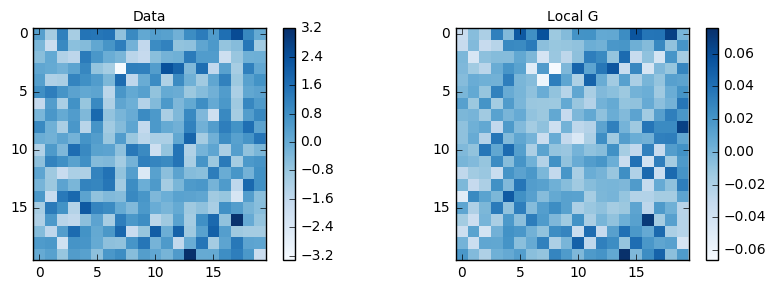

In [174]:
lg = G_Local(y, w)
lgstar = G_Local(y, w, star=True)

plt.figure(1, figsize = (10,3))
ax = plt.subplot(121)
plt.imshow(y, cmap = 'Blues', interpolation='none')
plt.title('Data', fontsize = 10)
plt.colorbar()

ax = plt.subplot(122)
plt.title('Local G', fontsize = 10)
plt.imshow(lg.Gs.reshape((nx,nx)), cmap = 'Blues', interpolation='none')
plt.colorbar()
# plt.pcolor((lm.p_sim<0.05).reshape(nx,nx), alpha  = 0.5, cmap = 'cubehelix')

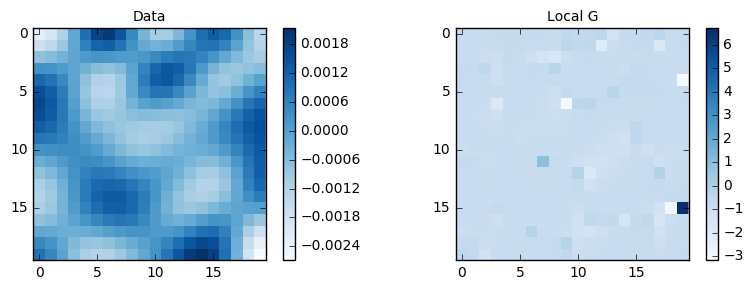

In [175]:
lg = G_Local(z, w)
lgstar = G_Local(z, w, star=True)

plt.figure(1, figsize = (10,3))
ax = plt.subplot(121)
plt.imshow(z, cmap = 'Blues', interpolation='none')
plt.title('Data', fontsize = 10)
plt.colorbar()

ax = plt.subplot(122)
plt.title('Local G', fontsize = 10)
plt.imshow(lg.Gs.reshape((nx,nx)), cmap = 'Blues', interpolation='none')
plt.colorbar()
# plt.pcolor((lm.p_sim<0.05).reshape(nx,nx), alpha  = 0.5, cmap = 'cubehelix')